# Anpassungstest

Überprüfen mit Hilfe des Anpassungstests, ob das BIP pro Kopf ("GDP.per.capita") der im Bericht aufgelisteten Länder gleichverteilt ist.

In [2]:
df<-read.csv('world_happiness_2019.csv')
head(df)
str(df)

Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


'data.frame':	156 obs. of  9 variables:
 $ Overall.rank                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country.or.region           : Factor w/ 156 levels "Afghanistan",..: 44 37 106 58 99 134 133 100 24 7 ...
 $ Score                       : num  7.77 7.6 7.55 7.49 7.49 ...
 $ GDP.per.capita              : num  1.34 1.38 1.49 1.38 1.4 ...
 $ Social.support              : num  1.59 1.57 1.58 1.62 1.52 ...
 $ Healthy.life.expectancy     : num  0.986 0.996 1.028 1.026 0.999 ...
 $ Freedom.to.make.life.choices: num  0.596 0.592 0.603 0.591 0.557 0.572 0.574 0.585 0.584 0.532 ...
 $ Generosity                  : num  0.153 0.252 0.271 0.354 0.322 0.263 0.267 0.33 0.285 0.244 ...
 $ Perceptions.of.corruption   : num  0.393 0.41 0.341 0.118 0.298 0.343 0.373 0.38 0.308 0.226 ...


In [3]:
subset(df,subset=(df$Country.or.region=='Germany'))

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
17,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265


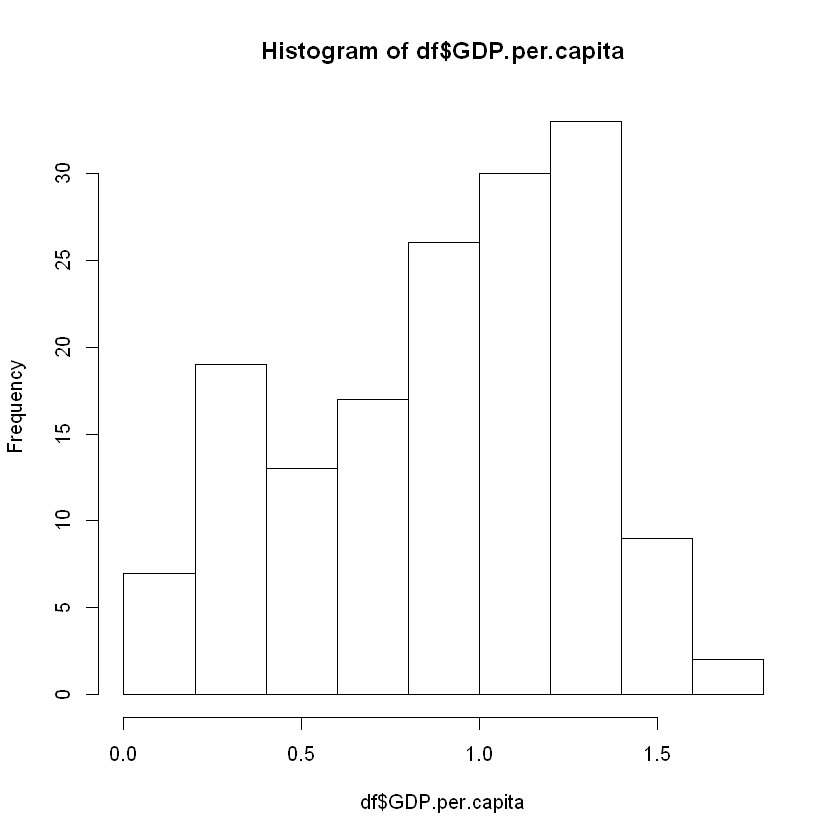

In [4]:
hist(df$GDP.per.capita)
#das Histogramm deutet eher nicht auf eine stetige Gleichverteilung hin.

In [5]:
# die Variable BIP pro Kopf in 5 Gruppen einteilen.
mi<-min(df$GDP.per.capita)
ma<-max(df$GDP.per.capita)
v<-cut(df$GDP.per.capita,breaks=seq(mi,ma+0.000001,length=6),right=FALSE)
tab<-table(factor(x=v,labels=c( "niedrig", "eher_niedrig", "mittel", "eher_hoch", "hoch")))
tab



     niedrig eher_niedrig       mittel    eher_hoch         hoch 
          19           25           41           49           22 

In [6]:
#Anpassungstest
chisq.test(x=tab,p=rep(1/5,5))
# Nur zum Berechnen des Werte von chisq
# R nutzt hier df=5-1=4 Freiheitsgrade, obwohl die Parameter a und b 
# der Gleichverteilung geschätzt werden mussten.


	Chi-squared test for given probabilities

data:  tab
X-squared = 21.949, df = 4, p-value = 0.0002052


In [7]:
data.frame(abs=c(tab),relativ=c(prop.table(tab)),rel_gl=0.2,erwartet=0.2*sum(tab))

,abs,relativ,rel_gl,erwartet
niedrig,19,0.1217949,0.2,31.2
eher_niedrig,25,0.1602564,0.2,31.2
mittel,41,0.2628205,0.2,31.2
eher_hoch,49,0.3141026,0.2,31.2
hoch,22,0.1410256,0.2,31.2


In [8]:
# exakte P_value
p.wert<-1- pchisq(chisq.test(x=tab,p=rep(1/5,5))$statistic,df=2)
p.wert
# Wegen des sehr niedrigen p-Werts (p = 0.00001713549) wird die Nullhypothese 
# selbst bei einem Signifikanzniveau von 0.01 verworfen.
# Es gibt somit gute Gründe daran zu zweifeln, 
# dass die Verteilung des BIP pro Kopf der im Bericht gelisteten Länder in 2019 gleichverteilt ist.

X-squared 
1.713549e-05

# Unabhängigkeitstest

In [10]:
# die Variable "GDP.per.capita" in 2 gleich breite Gruppen einteilen
v1<-cut(df$GDP.per.capita,breaks=seq(mi,ma+0.0000001,length=3),right=F)
GDP<-factor(v1,labels=c("niedrig", "hoch"))
table(GDP)

GDP
niedrig    hoch 
     63      93 

In [11]:
# die Variable "Score" in 3 gleich breite Gruppen einteilen
mi2<-min(df$Score)
ma2<-max(df$Score)
v2<-cut(df$Score,breaks=seq(mi2,ma2+0.000001,length=4),right=F)
Score<-factor(v2,labels=c("niedrig", "mittel", "hoch"))
table(Score)

Score
niedrig  mittel    hoch 
     35      79      42 

In [12]:
#Kreuztabelle mit der Anzahl der Länder für jede der 6 Zellen.
tab2<-table(GDP ,Score)
tab2

         Score
GDP       niedrig mittel hoch
  niedrig      30     30    3
  hoch          5     49   39

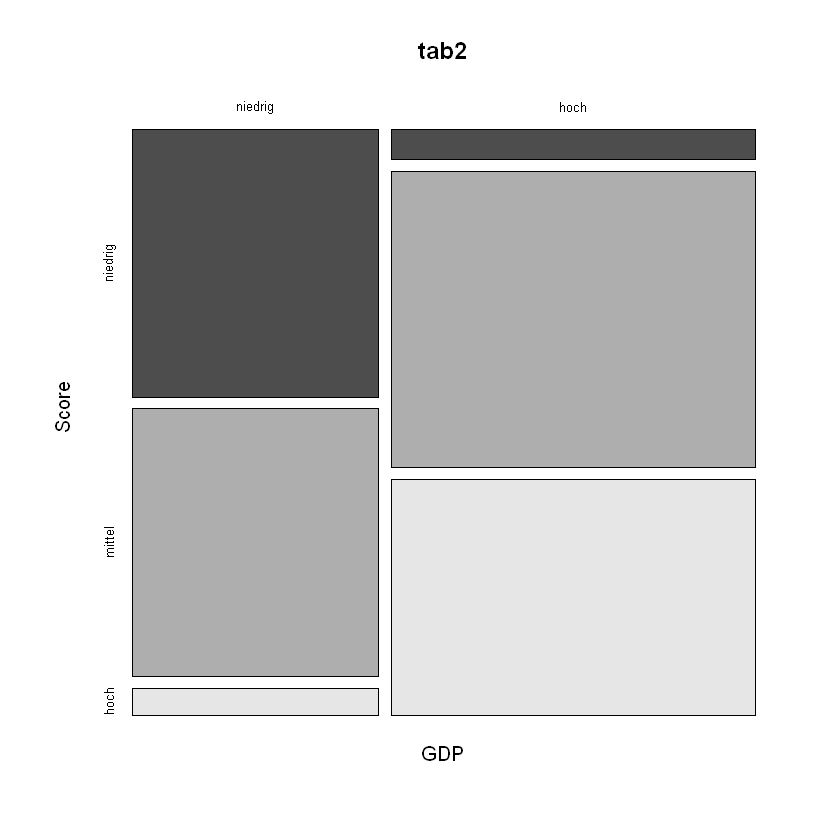

In [13]:
mosaicplot(tab2,col=T)
# der Mosaikplot deutet auf eine Abhängigkeit der beiden Variablen hin 
#nur wenige Länder mit niedrigem BIP weisen einen hohen Glücks-Score auf, 
# und nur wenige Länder mit hohem BIP weisen einen niedrigen Glücks-Score auf.

In [18]:
#chi^2-Unabhängigkeitstest
chisq.test(x = tab2, correct=FALSE)
# Das Ergebnis ist signifikant (Chi-squared = 49.339, df = 2, p-value = 1.932e-11). Die Nullhypothese
# der Unabhängigkeit wird verworfen. Glücksscore und BIP Index sind nicht unabhängig.


	Pearson's Chi-squared test

data:  tab2
X-squared = 49.339, df = 2, p-value = 1.932e-11



Call:
lm(formula = df$Score ~ df$GDP.per.capita)

Coefficients:
      (Intercept)  df$GDP.per.capita  
            3.399              2.218  


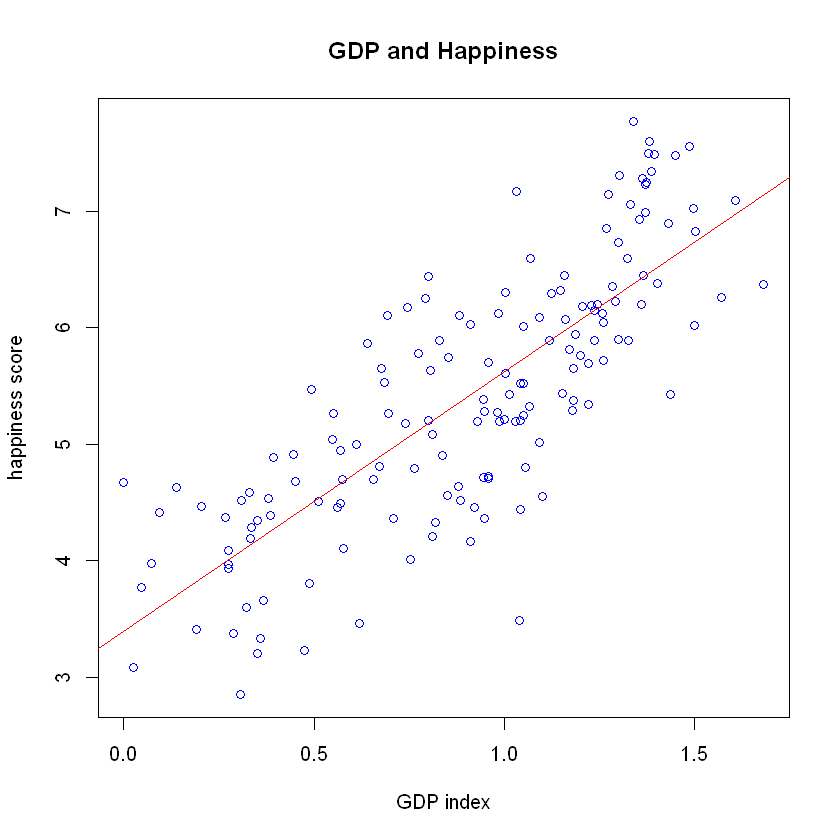

In [24]:
plot(df$GDP.per.capita,df$Score,col="blue", main="GDP and Happiness", xlab="GDP index", ylab="happiness score")
abline(lm(df$Score ~ df$GDP.per.capita), col="red")
lm(df$Score ~ df$GDP.per.capita)
# Steigt der BIP Index um einen Punkt, erhöht sich der mittlere
# Glücks-Score geschätzt um 2.218 Punkte.